In [1]:
pip install lmfit

Note: you may need to restart the kernel to use updated packages.


,T_CEA_yK,CEA_yMPa,T_ECN_yK,ECN_yMPa,T_CIEMAT_yK,CIEMAT_yMPa,T_FZK_yK,FZK_yMPa,T_JAERI_yK,JAERI_yMPa
0,16.989027,521.843961,19.899852,495.672374,20.420682,502.574531,300.979055,463.714501,17.136249,552.384017
1,250.696868,472.679341,82.964550,508.102903,301.958753,438.396986,351.616576,458.507787,499.958474,430.916987
2,250.118711,459.105338,202.778599,474.512850,400.479066,423.881286,401.345427,448.949691,653.496893,226.921269
3,300.941051,464.762144,302.875923,458.187540,501.037782,373.225861,601.060114,305.298825,NaN,NaN
4,351.739048,445.990310,400.567813,443.008313,499.983179,355.769941,652.530493,228.365371,NaN,NaN
5,499.060812,399.152010,449.644329,425.296982,NaN,NaN,700.849226,165.003081,NaN,NaN
6,553.224289,358.002468,501.608174,407.020175,NaN,NaN,NaN,NaN,NaN,NaN
7,653.608520,237.667774,554.030279,365.607703,NaN,NaN,NaN,NaN,NaN,NaN


**Fitting parameters for F82H Yield Strength** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 43
    # variables        = 4
    chi-square         = 15704.9287
    reduced chi-square = 402.690479
    Akaike info crit   = 261.722779
    Bayesian info crit = 268.767580
    R-squared          = 0.96090419
[[Variables]]
    a: -3.1117e-06 +/- 4.3907e-07 (14.11%) (init = 1)
    b:  0.00496028 +/- 8.2457e-04 (16.62%) (init = 1)
    c: -2.71634278 +/- 0.48372624 (17.81%) (init = 1)
    d:  960.920802 +/- 86.9509574 (9.05%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9961
    C(b, c) = -0.9945
    C(c, d) = -0.9903
    C(a, c) = +0.9817
    C(b, d) = +0.9716
    C(a, d) = -0.9497


**The equation for F82H Yield Strength is:**


-3.112e-6*T**3 + 0.00496*T**2 - 2.716*T + 960.9

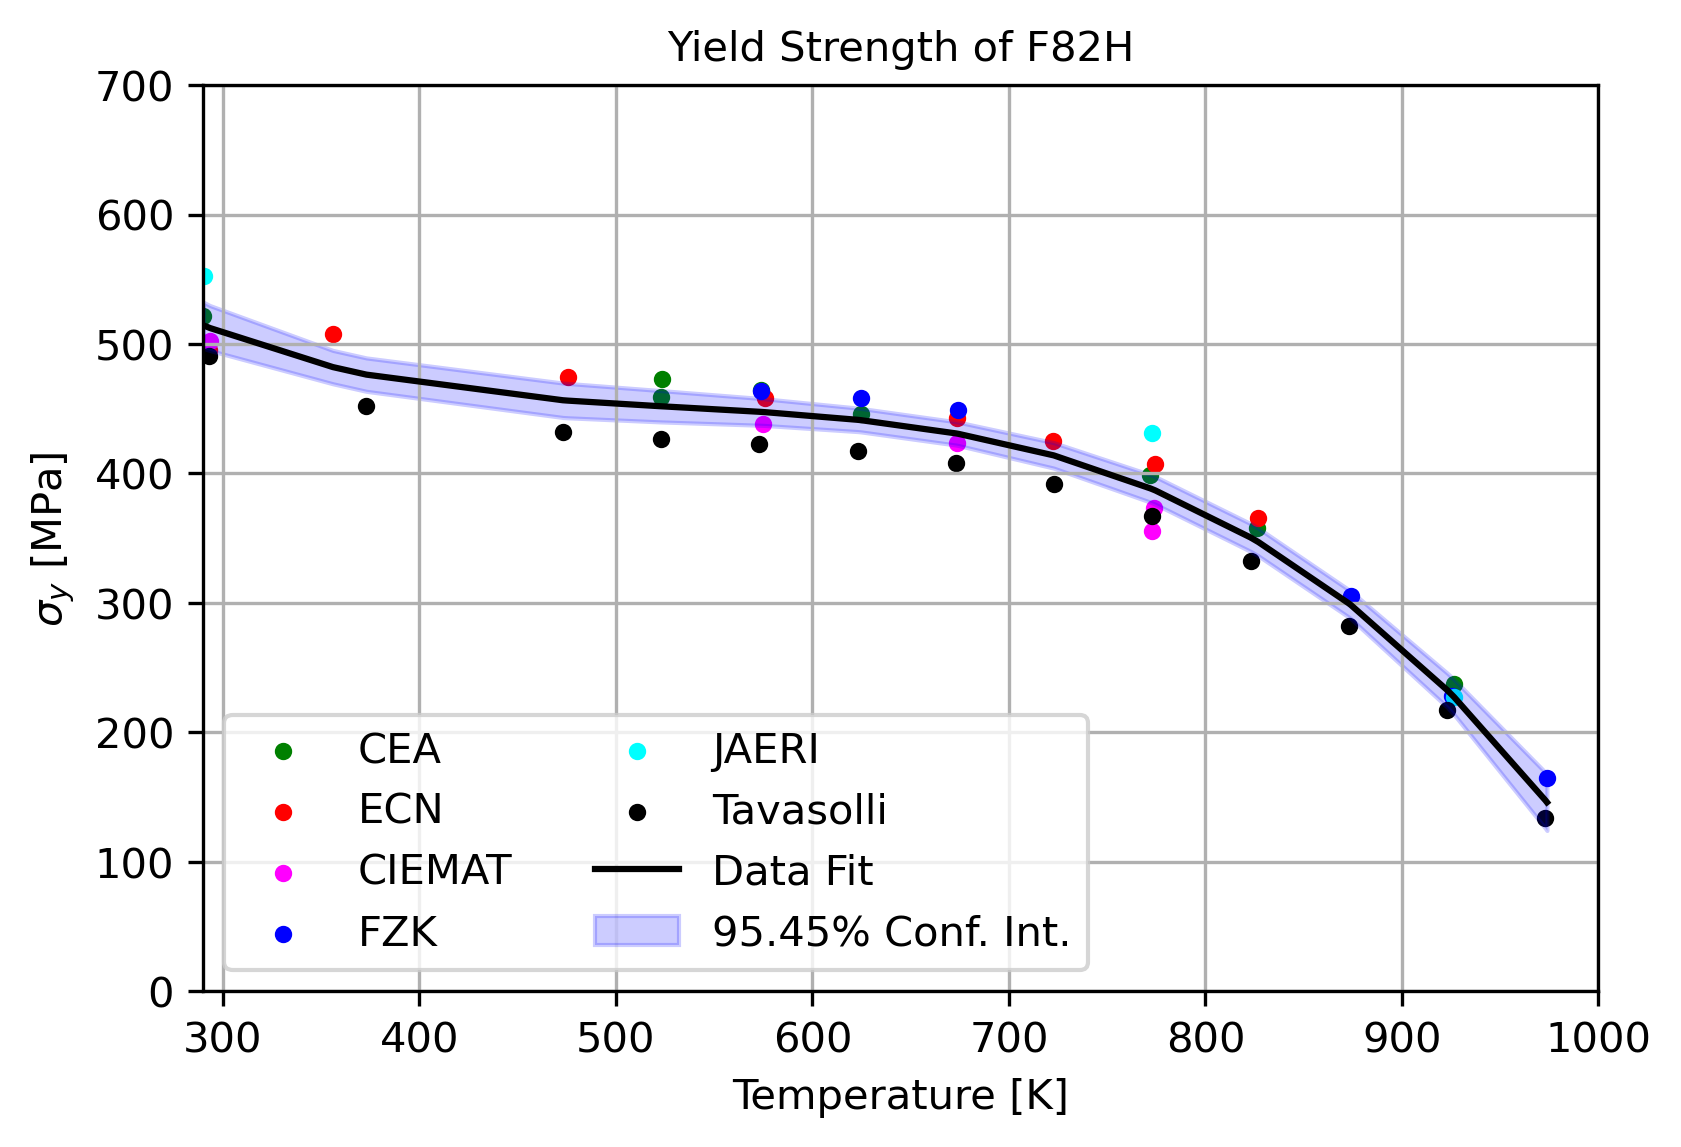

In [4]:
%run Utilities_modeling_Indro.ipynb
%run Utilities_plots_Indro.ipynb

# Excel spreadsheet and material name strings
excel_filename = 'F82H_Indro.xlsx'
material_name = "F82H"

# Font and marker sizes for plotting
fsize = 10 # font size
msize = 10 # marker size

# Load excel data for desired property name
material_property = "Yield Strength"
load_data(excel_filename, material_property, header_rows_list=[2], num_data_rows=20, room_temp=293)

# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

# Additional data for fitting
theta = np.array([20, 100, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700])
s_y_tafa = np.array([491, 452, 432, 427, 423, 417, 408, 392, 367, 332, 282, 217, 134])
s_u_tafa = np.array([610, 563, 526, 512, 499, 484, 467, 444, 415, 377, 329, 269, 194])

# Concatenate and sort data for fitting
variables = [globals()[var_name] for var_name in var_names]
vars_x = variables[::2] + [theta]
vars_y = variables[1::2] + [s_y_tafa]

T_y, s_y = concatenate_and_sort(vars_x, vars_y)

# Convert temperature to Kelvin
T_Ky = T_y + 273

x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan', 'black']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['CEA', 'ECN', 'CIEMAT', 'FZK', 'JAERI', 'Tavasolli']

fit_result = get_model_fit_and_print_it(T_Ky, s_y, fit_func='poly', poly_deg=3,\
    material_name=material_name, property_name=material_property, eq_digits=6, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'$\sigma_y$ [MPa]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 700], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)

plot_fit_and_conf(T_Ky, s_y, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')

,T_CEA_uK,CEA_uMPa,T_ECN_uK,ECN_uMPa,T_CIEMAT_uK,CIEMAT_uMPa,T_FZK_JAERI_uK,FZK_JAERI_uMPa
0,19.883690,636.194176,19.470673,625.930739,19.406076,613.075124,19.880718,656.808534
1,249.640933,529.611105,78.130252,608.814784,300.066745,498.784337,299.029337,516.301493
2,347.345292,499.317541,200.207251,554.298958,398.914934,467.483729,350.526986,490.576763
3,450.202342,442.119312,300.266598,514.904718,498.825122,390.710939,448.231257,440.433398
4,498.856082,412.865264,401.332095,492.921867,499.826334,371.288641,497.701877,459.330458
5,550.819140,353.491450,450.614773,456.902542,NaN,NaN,548.920888,347.005279
6,648.315147,214.193752,499.873757,431.036836,NaN,NaN,600.499369,286.641322
7,700.297656,146.484503,549.202130,375.435528,NaN,NaN,700.801548,153.242484


**Fitting parameters for F82H Ultimate Strength** 


[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 42
    # variables        = 4
    chi-square         = 13067.8802
    reduced chi-square = 343.891583
    Akaike info crit   = 249.090205
    Bayesian info crit = 256.040884
    R-squared          = 0.98033406
[[Variables]]
    a: -2.5753e-06 +/- 3.9375e-07 (15.29%) (init = 1)
    b:  0.00408749 +/- 7.4859e-04 (18.31%) (init = 1)
    c: -2.46801590 +/- 0.44472976 (18.02%) (init = 1)
    d:  1065.31362 +/- 80.5749908 (7.56%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.9959
    C(b, c) = -0.9946
    C(c, d) = -0.9906
    C(a, c) = +0.9814
    C(b, d) = +0.9726
    C(a, d) = -0.9504


**The equation for F82H Ultimate Strength is:**


-2.575e-6*T**3 + 0.004088*T**2 - 2.468*T + 1065.0

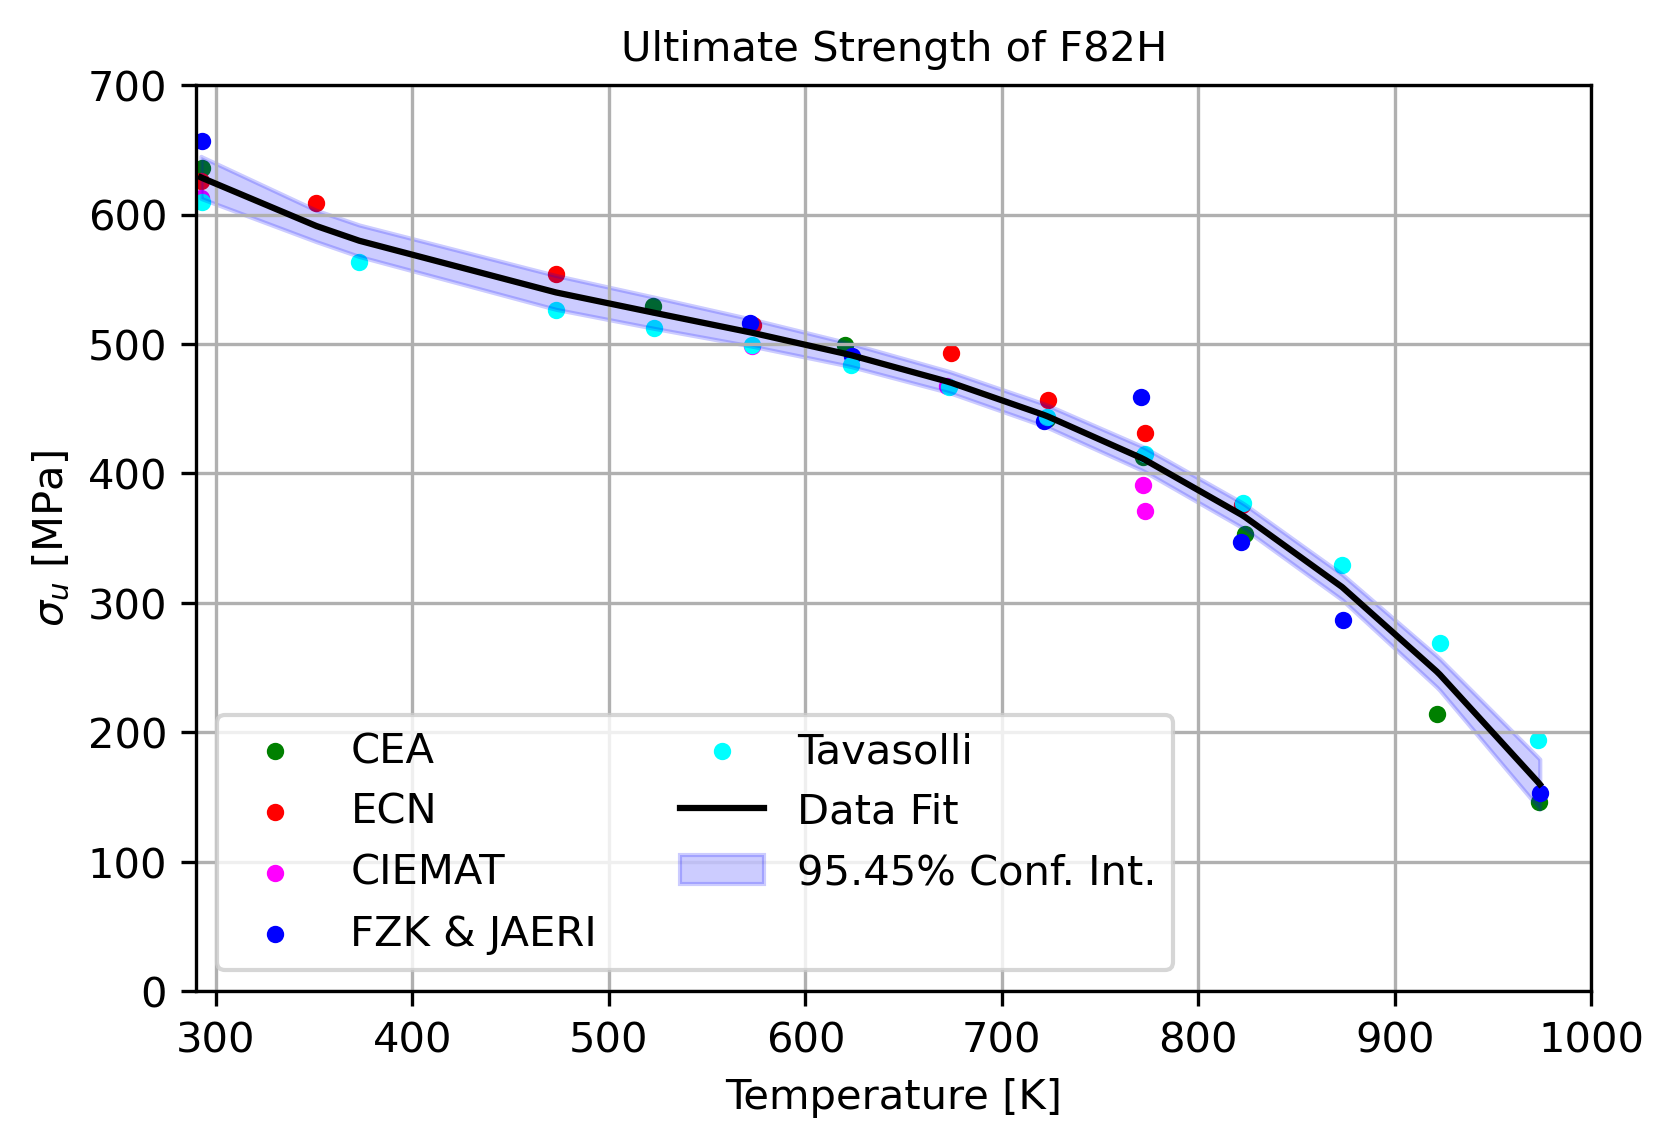

In [3]:
# Load excel data for desired property name
material_property = "Ultimate Strength"
load_data(excel_filename, material_property, header_rows_list=[2], num_data_rows=20, room_temp=293)

# Temperature range and initializations
T = np.arange(300, 1000, 10)
n = len(T)

# Additional data for fitting
theta = np.array([20, 100, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700])
s_u_tafa = np.array([610, 563, 526, 512, 499, 484, 467, 444, 415, 377, 329, 269, 194])

# Concatenate and sort data for fitting
variables = [globals()[var_name] for var_name in var_names]
vars_x = variables[::2] + [theta]
vars_y = variables[1::2] + [s_u_tafa]

T_u, s_u = concatenate_and_sort(vars_x, vars_y)

# Convert temperature to Kelvin
T_Ku = T_u + 273

x_data_list = [x + 273 for x in vars_x]
y_data_list = vars_y
data_colors = ['green', 'red', 'magenta', 'blue', 'cyan']
data_marker_sizes = [msize] * len(x_data_list)
data_labels = ['CEA', 'ECN', 'CIEMAT', 'FZK & JAERI', 'Tavasolli']

fit_result = get_model_fit_and_print_it(T_Ku, s_u, fit_func='poly', poly_deg=3,\
    material_name=material_name, property_name=material_property, eq_digits=4, print_bool=True)

custom_multi_plot(x_data_list, y_data_list,
                  x_label='Temperature [K]', y_label=r'$\sigma_u$ [MPa]', title=material_property + " of " + material_name,
                  scale='linear', font_size=fsize, xlim=[290, 1000], ylim=[0, 700], 
                  grid=True, legend=True, data_labels=data_labels, fit_labels=None,
                  data_colors=data_colors, fit_colors=None, data_marker_sizes=data_marker_sizes, 
                  fit_line_widths=[2], x_label_font_size=fsize, y_label_font_size=fsize, title_font_size=fsize,\
                  legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2)

plot_fit_and_conf(T_Ku, s_u, fit_result, sigma=2, legend=True, legend_font_size=fsize, legend_loc='lower left', legend_num_cols=2,\
                  fit_line_color='red', pred_int_fill_color='grey', conf_int_fill_color='blue')